## Importing Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/project

/content/drive/My Drive/project


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [8]:
from sklearn.metrics import confusion_matrix,classification_report,roc_curve

## Loading Both the data frames 

In [9]:
fake_users=pd.read_csv('fusers.csv')
fake_users.head(5)

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,url,lang,time_zone,location,default_profile,default_profile_image,geo_enabled,profile_image_url,profile_banner_url,profile_use_background_image,profile_background_image_url_https,profile_text_color,profile_image_url_https,profile_sidebar_border_color,profile_background_tile,profile_sidebar_fill_color,profile_background_image_url,profile_background_color,profile_link_color,utc_offset,protected,verified,description,updated,dataset
0,370098498,pirfectmoses,pirfectmoses,24,4,588,16,0,Thu Sep 08 13:20:35 +0000 2011,NaN,en,NaN,NaN,NaN,NaN,NaN,http://a0.twimg.com/profile_images/3146805145/...,https://twimg0-a.akamaihd.net/profile_banners/...,1,https://twimg0-a.akamaihd.net/profile_backgrou...,333333,https://twimg0-a.akamaihd.net/profile_images/3...,FFFFFF,NaN,DDEEF6,http://a0.twimg.com/profile_background_images/...,C6E2EE,1F98C7,NaN,NaN,NaN,NaN,2015-02-14 10:40:01,INT
1,37384589,SAK Nair,bsknair1967,656,57,693,597,0,Sun May 03 07:35:13 +0000 2009,NaN,en,NaN,Kuwait,1.0,NaN,NaN,http://a0.twimg.com/profile_images/1642325536/...,NaN,1,https://si0.twimg.com/images/themes/theme1/bg.png,333333,https://si0.twimg.com/profile_images/164232553...,C0DEED,NaN,DDEEF6,http://a0.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,NaN,NaN,NaN,in Kuwait with my buetiful family.,2015-02-14 10:40:01,INT
2,72110028,Deepak,dedjven,1234,15,104,1150,0,Sun Sep 06 19:50:08 +0000 2009,NaN,en,International Date Line West,India,NaN,NaN,1.0,http://a0.twimg.com/profile_images/1143114846/...,NaN,1,https://si0.twimg.com/images/themes/theme14/bg...,333333,https://si0.twimg.com/profile_images/114311484...,EEEEEE,1.0,EFEFEF,http://a0.twimg.com/images/themes/theme14/bg.gif,131516,009999,-39600.0,NaN,NaN,NaN,2015-02-14 10:40:01,INT
3,82885728,Marcos Vinicius,BrowAlves,573,14,227,530,0,Fri Oct 16 14:02:48 +0000 2009,NaN,en,NaN,Rio de Janeiro,NaN,NaN,NaN,http://a0.twimg.com/profile_images/2630736938/...,NaN,1,https://si0.twimg.com/profile_background_image...,1F1D1F,https://si0.twimg.com/profile_images/263073693...,C0DEED,NaN,DDEEF6,http://a0.twimg.com/profile_background_images/...,C0DEED,0084B4,NaN,NaN,NaN,NaN,2015-02-14 10:40:01,INT
4,110120789,Shri Kant Kanaujia,kanaujiask,675,18,519,653,0,Sun Jan 31 12:08:41 +0000 2010,NaN,en,New Delhi,lucknow,1.0,1.0,NaN,http://a0.twimg.com/sticky/default_profile_ima...,NaN,1,https://si0.twimg.com/images/themes/theme1/bg.png,333333,https://si0.twimg.com/sticky/default_profile_i...,C0DEED,NaN,DDEEF6,http://a0.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,19800.0,NaN,NaN,NaN,2015-02-14 10:40:01,INT


In [10]:
fake_users.columns

Index(['id', 'name', 'screen_name', 'statuses_count', 'followers_count',
       'friends_count', 'favourites_count', 'listed_count', 'created_at',
       'url', 'lang', 'time_zone', 'location', 'default_profile',
       'default_profile_image', 'geo_enabled', 'profile_image_url',
       'profile_banner_url', 'profile_use_background_image',
       'profile_background_image_url_https', 'profile_text_color',
       'profile_image_url_https', 'profile_sidebar_border_color',
       'profile_background_tile', 'profile_sidebar_fill_color',
       'profile_background_image_url', 'profile_background_color',
       'profile_link_color', 'utc_offset', 'protected', 'verified',
       'description', 'updated', 'dataset'],
      dtype='object')

In [11]:
fake_users.shape

(1337, 34)

In [12]:
users=pd.read_csv('users.csv')
users.head(5)

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,url,lang,time_zone,location,default_profile,default_profile_image,geo_enabled,profile_image_url,profile_banner_url,profile_use_background_image,profile_background_image_url_https,profile_text_color,profile_image_url_https,profile_sidebar_border_color,profile_background_tile,profile_sidebar_fill_color,profile_background_image_url,profile_background_color,profile_link_color,utc_offset,protected,verified,description,updated,dataset
0,3610511,Davide Dellacasa,braddd,20370,5470,2385,145,52,Fri Apr 06 10:58:22 +0000 2007,http://braddd.tumblr.com,it,Rome,Roma,NaN,NaN,NaN,http://a0.twimg.com/profile_images/1575057050/...,https://si0.twimg.com/profile_banners/3610511/...,1.0,https://si0.twimg.com/profile_background_image...,0C3E53,https://si0.twimg.com/profile_images/157505705...,F2E195,NaN,FFF7CC,http://a0.twimg.com/profile_background_images/...,BADFCD,FF0000,3600.0,NaN,NaN,Founder of http://www.screenweek.it & http://w...,2015-02-14 10:54:49,E13
1,5656162,Simone Economo,eKoeS,3131,506,381,9,40,Mon Apr 30 15:08:42 +0000 2007,http://www.lineheight.net/,en,Rome,"Rome, Italy",NaN,NaN,NaN,http://a0.twimg.com/profile_images/1901298312/...,NaN,1.0,https://si0.twimg.com/images/themes/theme1/bg.png,333333,https://si0.twimg.com/profile_images/190129831...,FFFFFF,NaN,DDEEF6,http://a0.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,3600.0,NaN,NaN,BSc degree (cum laude) in Computer Engineering...,2015-02-14 10:54:49,E13
2,5682702,tacone,tacone_,4024,264,87,323,16,Tue May 01 11:53:40 +0000 2007,http://t.co/LKrl1dZE,en,Rome,Internets,NaN,NaN,NaN,http://a0.twimg.com/profile_images/1640620850/...,https://si0.twimg.com/profile_banners/5682702/...,1.0,https://si0.twimg.com/profile_background_image...,666666,https://si0.twimg.com/profile_images/164062085...,181A1E,1.0,000000,http://a0.twimg.com/profile_background_images/...,1A1B1F,2FC2EF,3600.0,NaN,NaN,Cogito ergo bestemmio.,2015-02-14 10:54:49,E13
3,6067292,alesaura,alesstar,40586,640,622,1118,32,Tue May 15 16:55:16 +0000 2007,http://alesstar.wordpress.com/,en,Rome,NaN,NaN,NaN,1.0,http://a0.twimg.com/profile_images/2797534662/...,https://si0.twimg.com/profile_banners/6067292/...,1.0,https://si0.twimg.com/images/themes/theme4/bg.gif,3C3940,https://si0.twimg.com/profile_images/279753466...,FFFFFF,NaN,95E8EC,http://a0.twimg.com/images/themes/theme4/bg.gif,0099B9,0099B9,3600.0,NaN,NaN,"Se la vita ti dà sarde, scapocciale!",2015-02-14 10:54:49,E13
4,6015122,Angelo,PerDiletto,2016,62,64,13,0,Sun May 13 19:52:00 +0000 2007,http://www.flickr.com/per_diletto,it,Rome,"iPhone: 44.069630,12.569966",NaN,NaN,1.0,http://a0.twimg.com/profile_images/1073412966/...,NaN,1.0,https://si0.twimg.com/images/themes/theme18/bg...,333333,https://si0.twimg.com/profile_images/107341296...,EEEEEE,NaN,F6F6F6,http://a0.twimg.com/images/themes/theme18/bg.gif,ACDED6,038543,3600.0,NaN,NaN,Je me souviens,2015-02-14 10:54:49,E13


In [13]:
users.shape

(1481, 34)

In [14]:
users.columns

Index(['id', 'name', 'screen_name', 'statuses_count', 'followers_count',
       'friends_count', 'favourites_count', 'listed_count', 'created_at',
       'url', 'lang', 'time_zone', 'location', 'default_profile',
       'default_profile_image', 'geo_enabled', 'profile_image_url',
       'profile_banner_url', 'profile_use_background_image',
       'profile_background_image_url_https', 'profile_text_color',
       'profile_image_url_https', 'profile_sidebar_border_color',
       'profile_background_tile', 'profile_sidebar_fill_color',
       'profile_background_image_url', 'profile_background_color',
       'profile_link_color', 'utc_offset', 'protected', 'verified',
       'description', 'updated', 'dataset'],
      dtype='object')

## Feature Engineering

### Adding fake columns

In [15]:
users['Is_Fake']=0

In [16]:
fake_users['Is_Fake']=1

### Joining two data frame

In [17]:
dfs=[users,fake_users]

In [18]:
df=pd.concat(dfs,sort=True)

In [19]:
df.head()

,Is_Fake,created_at,dataset,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,lang,listed_count,location,name,profile_background_color,profile_background_image_url,profile_background_image_url_https,profile_background_tile,profile_banner_url,profile_image_url,profile_image_url_https,profile_link_color,profile_sidebar_border_color,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,protected,screen_name,statuses_count,time_zone,updated,url,utc_offset,verified
0,0,Fri Apr 06 10:58:22 +0000 2007,E13,NaN,NaN,Founder of http://www.screenweek.it & http://w...,145,5470,2385,NaN,3610511,it,52,Roma,Davide Dellacasa,BADFCD,http://a0.twimg.com/profile_background_images/...,https://si0.twimg.com/profile_background_image...,NaN,https://si0.twimg.com/profile_banners/3610511/...,http://a0.twimg.com/profile_images/1575057050/...,https://si0.twimg.com/profile_images/157505705...,FF0000,F2E195,FFF7CC,0C3E53,1.0,NaN,braddd,20370,Rome,2015-02-14 10:54:49,http://braddd.tumblr.com,3600.0,NaN
1,0,Mon Apr 30 15:08:42 +0000 2007,E13,NaN,NaN,BSc degree (cum laude) in Computer Engineering...,9,506,381,NaN,5656162,en,40,"Rome, Italy",Simone Economo,C0DEED,http://a0.twimg.com/images/themes/theme1/bg.png,https://si0.twimg.com/images/themes/theme1/bg.png,NaN,NaN,http://a0.twimg.com/profile_images/1901298312/...,https://si0.twimg.com/profile_images/190129831...,0084B4,FFFFFF,DDEEF6,333333,1.0,NaN,eKoeS,3131,Rome,2015-02-14 10:54:49,http://www.lineheight.net/,3600.0,NaN
2,0,Tue May 01 11:53:40 +0000 2007,E13,NaN,NaN,Cogito ergo bestemmio.,323,264,87,NaN,5682702,en,16,Internets,tacone,1A1B1F,http://a0.twimg.com/profile_background_images/...,https://si0.twimg.com/profile_background_image...,1.0,https://si0.twimg.com/profile_banners/5682702/...,http://a0.twimg.com/profile_images/1640620850/...,https://si0.twimg.com/profile_images/164062085...,2FC2EF,181A1E,000000,666666,1.0,NaN,tacone_,4024,Rome,2015-02-14 10:54:49,http://t.co/LKrl1dZE,3600.0,NaN
3,0,Tue May 15 16:55:16 +0000 2007,E13,NaN,NaN,"Se la vita ti dà sarde, scapocciale!",1118,640,622,1.0,6067292,en,32,NaN,alesaura,0099B9,http://a0.twimg.com/images/themes/theme4/bg.gif,https://si0.twimg.com/images/themes/theme4/bg.gif,NaN,https://si0.twimg.com/profile_banners/6067292/...,http://a0.twimg.com/profile_images/2797534662/...,https://si0.twimg.com/profile_images/279753466...,0099B9,FFFFFF,95E8EC,3C3940,1.0,NaN,alesstar,40586,Rome,2015-02-14 10:54:49,http://alesstar.wordpress.com/,3600.0,NaN
4,0,Sun May 13 19:52:00 +0000 2007,E13,NaN,NaN,Je me souviens,13,62,64,1.0,6015122,it,0,"iPhone: 44.069630,12.569966",Angelo,ACDED6,http://a0.twimg.com/images/themes/theme18/bg.gif,https://si0.twimg.com/images/themes/theme18/bg...,NaN,NaN,http://a0.twimg.com/profile_images/1073412966/...,https://si0.twimg.com/profile_images/107341296...,038543,EEEEEE,F6F6F6,333333,1.0,NaN,PerDiletto,2016,Rome,2015-02-14 10:54:49,http://www.flickr.com/per_diletto,3600.0,NaN


In [20]:
df['Is_Fake'].value_counts()

0    1481
1    1337
Name: Is_Fake, dtype: int64

In [21]:
df.shape

(2818, 35)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2818 entries, 0 to 1336
Data columns (total 35 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Is_Fake                             2818 non-null   int64  
 1   created_at                          2818 non-null   object 
 2   dataset                             2818 non-null   object 
 3   default_profile                     1728 non-null   float64
 4   default_profile_image               8 non-null      float64
 5   description                         2547 non-null   object 
 6   favourites_count                    2818 non-null   int64  
 7   followers_count                     2818 non-null   int64  
 8   friends_count                       2818 non-null   int64  
 9   geo_enabled                         721 non-null    float64
 10  id                                  2818 non-null   int64  
 11  lang                                2818 no

In [23]:
df.isnull().sum()

Is_Fake                                  0
created_at                               0
dataset                                  0
default_profile                       1090
default_profile_image                 2810
description                            271
favourites_count                         0
followers_count                          0
friends_count                            0
geo_enabled                           2097
id                                       0
lang                                     0
listed_count                             0
location                               547
name                                     0
profile_background_color                 0
profile_background_image_url             0
profile_background_image_url_https       0
profile_background_tile               2329
profile_banner_url                    1831
profile_image_url                        0
profile_image_url_https                  0
profile_link_color                       0
profile_sid

### Selecting the important features

In [24]:
df.describe()

,Is_Fake,default_profile,default_profile_image,favourites_count,followers_count,friends_count,geo_enabled,id,listed_count,profile_background_tile,profile_use_background_image,protected,statuses_count,utc_offset,verified
count,2818.000000,1728.0,8.0,2818.000000,2818.000000,2818.000000,721.0,2.818000e+03,2818.000000,489.0,2760.0,0.0,2818.000000,1069.000000,0.0
mean,0.474450,1.0,1.0,234.541164,371.105039,395.363023,1.0,5.374889e+08,2.818666,1.0,1.0,NaN,1672.198368,1478.391020,NaN
std,0.499435,0.0,0.0,1445.847248,8022.631339,465.694322,0.0,2.977005e+08,23.480430,0.0,0.0,NaN,4884.669157,8108.211889,NaN
min,0.000000,1.0,1.0,0.000000,0.000000,0.000000,1.0,3.610511e+06,0.000000,1.0,1.0,NaN,0.000000,-39600.000000,NaN
25%,0.000000,1.0,1.0,0.000000,17.000000,168.000000,1.0,3.620867e+08,0.000000,1.0,1.0,NaN,35.000000,3600.000000,NaN
50%,0.000000,1.0,1.0,0.000000,26.000000,306.000000,1.0,6.162253e+08,0.000000,1.0,1.0,NaN,77.000000,3600.000000,NaN
75%,1.000000,1.0,1.0,37.000000,111.000000,519.000000,1.0,6.177673e+08,1.000000,1.0,1.0,NaN,1087.750000,3600.000000,NaN
max,1.000000,1.0,1.0,44349.000000,408372.000000,12773.000000,1.0,1.391998e+09,744.000000,1.0,1.0,NaN,79876.000000,36000.000000,NaN


In [25]:
df.groupby('Is_Fake')['lang'].value_counts()

Is_Fake  lang
0        it      1297
         en       166
         es        10
         fr         3
         de         2
         gl         1
         nl         1
         tr         1
1        en      1336
         es         1
Name: lang, dtype: int64

In [26]:
df.groupby('Is_Fake')['listed_count'].value_counts()

Is_Fake  listed_count
0        0                703
         1                276
         2                134
         3                 70
         4                 52
                         ... 
         486                1
         715                1
         744                1
1        0               1333
         1                  4
Name: listed_count, Length: 67, dtype: int64

In [27]:
df.groupby('Is_Fake')['default_profile'].value_counts()

Is_Fake  default_profile
0        1.0                 397
1        1.0                1331
Name: default_profile, dtype: int64

## Creating a new data frame with important features 

In [28]:
df1=df[['favourites_count','followers_count','statuses_count','friends_count','listed_count','geo_enabled','default_profile','profile_use_background_image','Is_Fake']]

In [29]:
df1.head()

,favourites_count,followers_count,statuses_count,friends_count,listed_count,geo_enabled,default_profile,profile_use_background_image,Is_Fake
0,145,5470,20370,2385,52,NaN,NaN,1.0,0
1,9,506,3131,381,40,NaN,NaN,1.0,0
2,323,264,4024,87,16,NaN,NaN,1.0,0
3,1118,640,40586,622,32,1.0,NaN,1.0,0
4,13,62,2016,64,0,1.0,NaN,1.0,0


In [30]:
df1.isnull().sum()

favourites_count                   0
followers_count                    0
statuses_count                     0
friends_count                      0
listed_count                       0
geo_enabled                     2097
default_profile                 1090
profile_use_background_image      58
Is_Fake                            0
dtype: int64

### EDA

In [31]:
df1.fillna(value=0,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [32]:
df1.head()

,favourites_count,followers_count,statuses_count,friends_count,listed_count,geo_enabled,default_profile,profile_use_background_image,Is_Fake
0,145,5470,20370,2385,52,0.0,0.0,1.0,0
1,9,506,3131,381,40,0.0,0.0,1.0,0
2,323,264,4024,87,16,0.0,0.0,1.0,0
3,1118,640,40586,622,32,1.0,0.0,1.0,0
4,13,62,2016,64,0,1.0,0.0,1.0,0


In [33]:
df1.groupby('Is_Fake')['default_profile'].value_counts()

Is_Fake  default_profile
0        0.0                1084
         1.0                 397
1        1.0                1331
         0.0                   6
Name: default_profile, dtype: int64

In [34]:
df1.groupby('Is_Fake')['geo_enabled'].value_counts()

Is_Fake  geo_enabled
0        0.0             762
         1.0             719
1        0.0            1335
         1.0               2
Name: geo_enabled, dtype: int64

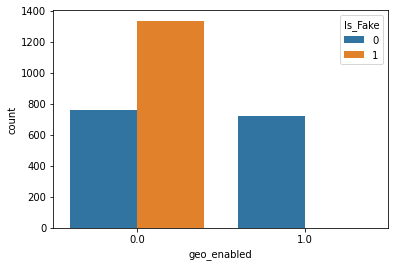

In [35]:
sns.countplot(df1['geo_enabled'],hue=df['Is_Fake'])

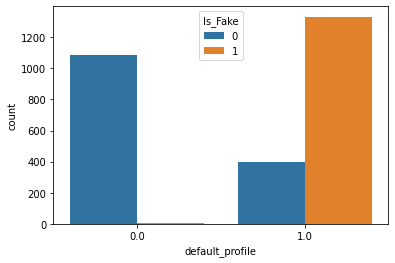

In [36]:
sns.countplot(df1['default_profile'],hue=df['Is_Fake'])

In [37]:
df1.groupby('Is_Fake')['profile_use_background_image'].value_counts()

Is_Fake  profile_use_background_image
0        1.0                             1423
         0.0                               58
1        1.0                             1337
Name: profile_use_background_image, dtype: int64

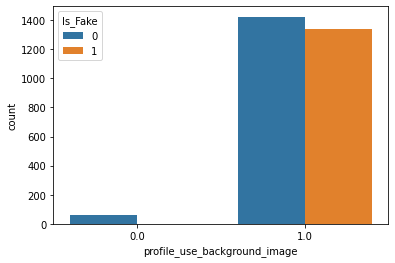

In [38]:
sns.countplot(df1['profile_use_background_image'],hue=df['Is_Fake'])

## Building the model with new data frame

In [39]:
df1.head()

,favourites_count,followers_count,statuses_count,friends_count,listed_count,geo_enabled,default_profile,profile_use_background_image,Is_Fake
0,145,5470,20370,2385,52,0.0,0.0,1.0,0
1,9,506,3131,381,40,0.0,0.0,1.0,0
2,323,264,4024,87,16,0.0,0.0,1.0,0
3,1118,640,40586,622,32,1.0,0.0,1.0,0
4,13,62,2016,64,0,1.0,0.0,1.0,0


In [40]:
df1.shape

(2818, 9)

In [41]:
X=df1.drop('Is_Fake',axis=1)

In [42]:
y=df1['Is_Fake']

### Trying different models

In [43]:
cv=ShuffleSplit(n_splits=10,random_state=42,test_size=0.3)

In [46]:
cross_val_score(RandomForestClassifier(),X,y,scoring='accuracy',cv=cv)

array([0.99527187, 0.9893617 , 0.9893617 , 0.99763593, 0.99408983,
       0.9964539 , 0.99408983, 0.99881797, 0.99527187, 0.9964539 ])

In [47]:
cross_val_score(SVC(),X,y,scoring='accuracy',cv=cv)

array([0.88416076, 0.87943262, 0.87943262, 0.84042553, 0.8498818 ,
       0.87588652, 0.88061466, 0.8286052 , 0.8498818 , 0.88061466])

In [48]:
cross_val_score(XGBClassifier(),X,y,scoring='accuracy',cv=cv)

array([0.9929078 , 0.99527187, 0.99054374, 0.99881797, 0.99763593,
       0.99172577, 0.99527187, 0.99527187, 0.99408983, 0.99408983])

### XG Boost is the most accurate

### Building the model

In [49]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [50]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1972, 8)
(846, 8)
(1972,)
(846,)


In [51]:
from numpy.random import seed
seed(1)

In [52]:
import keras
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras import optimizers

Using TensorFlow backend.


Epoch 1/8
1972/1972 [==============================] - 0s 201us/step - loss: 187.5418 - accuracy: 0.7901
Epoch 2/8
1972/1972 [==============================] - 0s 43us/step - loss: 8.6027 - accuracy: 0.8007
Epoch 3/8
1972/1972 [==============================] - 0s 42us/step - loss: 2.5482 - accuracy: 0.9042
Epoch 4/8
1972/1972 [==============================] - 0s 44us/step - loss: 1.8019 - accuracy: 0.9366
Epoch 5/8
1972/1972 [==============================] - 0s 42us/step - loss: 1.3549 - accuracy: 0.9138
Epoch 6/8
1972/1972 [==============================] - 0s 41us/step - loss: 0.9678 - accuracy: 0.9878
Epoch 7/8
1972/1972 [==============================] - 0s 47us/step - loss: 0.7783 - accuracy: 0.9868
Epoch 8/8
1972/1972 [==============================] - 0s 42us/step - loss: 0.7217 - accuracy: 0.9782


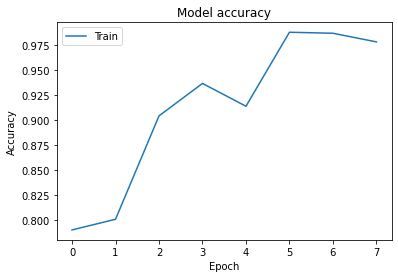

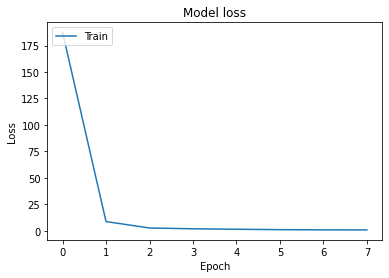

In [53]:
first_layer_size = 32
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=8))
model.add(Dense(64, input_dim=32,
                kernel_regularizer=regularizers.l2(0.0076),
                activity_regularizer=regularizers.l1(0.0023), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=8)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [54]:
score, acc = model.evaluate(x_test, y_test)
print(acc*100)

846/846 [==============================] - 0s 55us/step
98.6997663974762


In [55]:
xg=XGBClassifier()

In [56]:
xg.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [57]:
prediction=xg.predict(x_test)

### Testing the model

In [58]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       455
           1       0.99      0.99      0.99       391

    accuracy                           0.99       846
   macro avg       0.99      0.99      0.99       846
weighted avg       0.99      0.99      0.99       846



In [59]:
confusion_matrix(y_test,prediction)

array([[453,   2],
       [  4, 387]])

### ROC Curve

In [60]:
fpr, tpr, thresholds=roc_curve(y_test,prediction)

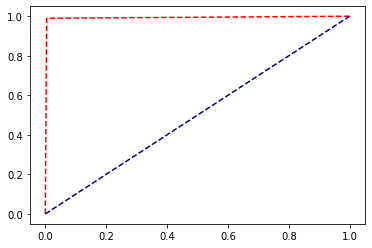

In [61]:
plt.plot(fpr,tpr,linestyle='--',color='red')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

## <center>Model is 99.9% accurate</center>

### Saving the model 

In [62]:
import pickle

In [63]:
with open('detector.pkl','wb') as f:
    pickle.dump(xg,f)